# Introduction

If someone has an idea for a new classifier, it should compare the performance of its new classifier with the performance of standard classifiers on some standard datasets.

But what are the performances of these standard classifiers on these standard datasets?

This notebook tries to answer this question.

# TensorFlow Version check

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Set experiment parameters

In [3]:
PARAM_NR_TEST_IMAGES = 10000
PARAM_NR_TRAIN_EPOCHS = 300

# MNIST

## Preparing the dataset

In [4]:
import numpy as np

def prepare_data():
    
    # 1. load MNIST dataset
    mnist_dataset = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()
    
    # 2. map image pixel values from [0,255] to [0,1]
    x_train = x_train.astype(float)
    x_test  = x_test.astype(float)
    
    x_train = x_train * (1.0/255.0)
    x_test  = x_test  * (1.0/255.0)
    
    # 3. images are 2D, prepare input as 1D input for a MLP
    x_train = x_train.reshape(-1,28*28)
    x_test  = x_test.reshape(-1,28*28)
    
    # 4. map train data target labels to one-hot encoded vectors
    y_train_onehot = np.zeros((y_train.size, y_train.max()+1))
    y_train_onehot[np.arange(y_train.size),y_train] = 1
    
    # 5. map test data target labels to one-hot encoded vectors
    y_test_onehot = np.zeros((y_test.size, y_train.max()+1))
    y_test_onehot[np.arange(y_test.size),y_test] = 1
    
    return x_train, y_train_onehot, \
           x_test,  y_test_onehot

# get MNIST data now
x_train, y_train, x_test, y_test = prepare_data()

In [5]:
x_train.shape

(60000, 784)

In [6]:
y_train.shape

(60000, 10)

In [7]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [8]:
x_test.shape

(10000, 784)

In [9]:
y_test.shape

(10000, 10)

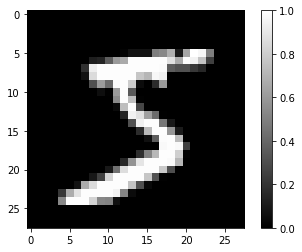

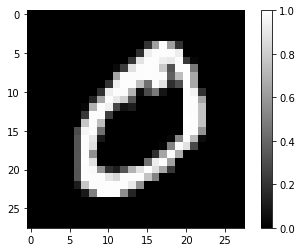

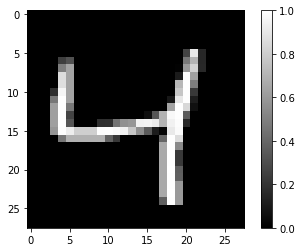

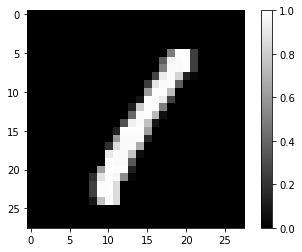

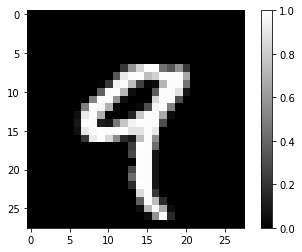

In [10]:
from matplotlib import pyplot as plt

for i in range(0,5):
    plt.imshow( x_train[i,:].reshape(28,28), cmap="gray" )
    plt.colorbar()
    plt.show()

## Model test function

In [23]:
def model_test(your_model, x_test, y_test, how_many_to_test=None, model_type="MLP"):
    
    nr_test_samples = x_test.shape[0]
    
    if how_many_to_test is None:
        how_many_to_test = nr_test_samples
   
    correct = 0
    for sample_id in range(0, how_many_to_test):
        
        if sample_id % 100 == 0:
            print("tested so far {0} of {1} images".format(sample_id, how_many_to_test))

        # get next test sample
        input_vec   = x_test[sample_id]
        teacher_vec = y_test[sample_id]
        
        # compute prediction vector
                
        if model_type == "MLP":
            
            # note: the input to a MLP is a batch of 1D inputs, so 2D!
            pred_vec = your_model.predict( input_vec.reshape(1, -1) )
            
            
        elif model_type == "CNN":
            
            # note: the input to a CNN is a batch of 3D inputs, so 3D!
            # 1 test image
            # 28 pixel wide
            # 28 pixel high
            # 1 color channel (gray-scale image)
            # --> shape is (1,28,28,1)
            pred_vec = your_model.predict( input_vec.reshape(1, 28,28,1) )
        
        # compute predicted label
        pred_label = np.argmax( pred_vec )
        
        # get actual label
        gt_label = np.argmax( teacher_vec )
        
        #print("pred: {0} vs. gt: {1}".format(pred_label, gt_label))
        
        # was the predicted label correct?
        if pred_label == gt_label:
            correct += 1
            
    acc = correct/how_many_to_test
    return acc

## Perceptron

In [11]:
from tensorflow import keras

tf.keras.backend.clear_session()

nr_inputs = 28*28

model = keras.Sequential()
model.add(keras.layers.Dense(10,
                             activation="linear",
                             input_shape=(nr_inputs,)))
model.compile(optimizer='sgd',               
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_test(model, x_test, y_test, PARAM_NR_TEST_IMAGES)

tested so far 0 of 10000 images
tested so far 100 of 10000 images
tested so far 200 of 10000 images
tested so far 300 of 10000 images
tested so far 400 of 10000 images
tested so far 500 of 10000 images
tested so far 600 of 10000 images
tested so far 700 of 10000 images
tested so far 800 of 10000 images
tested so far 900 of 10000 images
tested so far 1000 of 10000 images
tested so far 1100 of 10000 images
tested so far 1200 of 10000 images
tested so far 1300 of 10000 images
tested so far 1400 of 10000 images
tested so far 1500 of 10000 images
tested so far 1600 of 10000 images
tested so far 1700 of 10000 images
tested so far 1800 of 10000 images
tested so far 1900 of 10000 images
tested so far 2000 of 10000 images
tested so far 2100 of 10000 images
tested so far 2200 of 10000 images
tested so far 2300 of 10000 images
tested so far 2400 of 10000 images
tested so far 2500 of 10000 images
tested so far 2600 of 10000 images
tested so far 2700 of 10000 images
tested so far 2800 of 10000 imag

0.1003

In [14]:
history = model.fit(x_train, y_train, epochs=PARAM_NR_TRAIN_EPOCHS, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/300
54000/54000 [==============================] - 4s 68us/sample - loss: 0.0858 - accuracy: 0.5836 - val_loss: 0.0602 - val_accuracy: 0.7693
Epoch 2/300
54000/54000 [==============================] - 4s 67us/sample - loss: 0.0586 - accuracy: 0.7562 - val_loss: 0.0518 - val_accuracy: 0.8177
Epoch 3/300
54000/54000 [==============================] - 3s 65us/sample - loss: 0.0529 - accuracy: 0.7892 - val_loss: 0.0480 - val_accuracy: 0.8338
Epoch 4/300
54000/54000 [==============================] - 3s 64us/sample - loss: 0.0500 - accuracy: 0.8061 - val_loss: 0.0459 - val_accuracy: 0.8447
Epoch 5/300
54000/54000 [==============================] - 3s 64us/sample - loss: 0.0482 - accuracy: 0.8158 - val_loss: 0.0444 - val_accuracy: 0.8530
Epoch 6/300
54000/54000 [==============================] - 2s 44us/sample - loss: 0.0469 - accuracy: 0.8227 - val_loss: 0.0433 - val_accuracy: 0.8558
Epoch 7/300
54000/54000 [==========================

Epoch 55/300
54000/54000 [==============================] - 2s 43us/sample - loss: 0.0394 - accuracy: 0.8512 - val_loss: 0.0369 - val_accuracy: 0.8768
Epoch 56/300
54000/54000 [==============================] - 2s 39us/sample - loss: 0.0394 - accuracy: 0.8516 - val_loss: 0.0368 - val_accuracy: 0.8757
Epoch 57/300
54000/54000 [==============================] - 2s 38us/sample - loss: 0.0394 - accuracy: 0.8517 - val_loss: 0.0368 - val_accuracy: 0.8787
Epoch 58/300
54000/54000 [==============================] - 2s 39us/sample - loss: 0.0393 - accuracy: 0.8516 - val_loss: 0.0367 - val_accuracy: 0.8762
Epoch 59/300
54000/54000 [==============================] - 3s 48us/sample - loss: 0.0393 - accuracy: 0.8515 - val_loss: 0.0368 - val_accuracy: 0.8790
Epoch 60/300
54000/54000 [==============================] - 3s 59us/sample - loss: 0.0393 - accuracy: 0.8524 - val_loss: 0.0367 - val_accuracy: 0.8752
Epoch 61/300
54000/54000 [==============================] - 3s 63us/sample - loss: 0.0393 - ac

Epoch 163/300
54000/54000 [==============================] - 2s 37us/sample - loss: 0.0387 - accuracy: 0.8534 - val_loss: 0.0364 - val_accuracy: 0.8775
Epoch 164/300
54000/54000 [==============================] - 2s 37us/sample - loss: 0.0387 - accuracy: 0.8540 - val_loss: 0.0364 - val_accuracy: 0.8762
Epoch 165/300
54000/54000 [==============================] - 2s 38us/sample - loss: 0.0387 - accuracy: 0.8532 - val_loss: 0.0364 - val_accuracy: 0.8778
Epoch 166/300
54000/54000 [==============================] - 2s 38us/sample - loss: 0.0387 - accuracy: 0.8526 - val_loss: 0.0363 - val_accuracy: 0.8765
Epoch 167/300
54000/54000 [==============================] - 2s 39us/sample - loss: 0.0387 - accuracy: 0.8532 - val_loss: 0.0363 - val_accuracy: 0.8780
Epoch 168/300
54000/54000 [==============================] - 2s 37us/sample - loss: 0.0387 - accuracy: 0.8528 - val_loss: 0.0363 - val_accuracy: 0.8765
Epoch 169/300
54000/54000 [==============================] - 2s 44us/sample - loss: 0.03

Epoch 217/300
54000/54000 [==============================] - 3s 56us/sample - loss: 0.0387 - accuracy: 0.8532 - val_loss: 0.0362 - val_accuracy: 0.8773
Epoch 218/300
54000/54000 [==============================] - 3s 57us/sample - loss: 0.0387 - accuracy: 0.8536 - val_loss: 0.0362 - val_accuracy: 0.8788
Epoch 219/300
54000/54000 [==============================] - 2s 40us/sample - loss: 0.0387 - accuracy: 0.8540 - val_loss: 0.0363 - val_accuracy: 0.8758
Epoch 220/300
54000/54000 [==============================] - 3s 61us/sample - loss: 0.0387 - accuracy: 0.8534 - val_loss: 0.0362 - val_accuracy: 0.8770
Epoch 221/300
54000/54000 [==============================] - 3s 51us/sample - loss: 0.0387 - accuracy: 0.8536 - val_loss: 0.0363 - val_accuracy: 0.8795
Epoch 222/300
54000/54000 [==============================] - 3s 56us/sample - loss: 0.0387 - accuracy: 0.8529 - val_loss: 0.0364 - val_accuracy: 0.8778
Epoch 223/300
54000/54000 [==============================] - 3s 61us/sample - loss: 0.03

Epoch 271/300
54000/54000 [==============================] - 3s 47us/sample - loss: 0.0386 - accuracy: 0.8538 - val_loss: 0.0363 - val_accuracy: 0.8772
Epoch 272/300
54000/54000 [==============================] - 3s 62us/sample - loss: 0.0386 - accuracy: 0.8535 - val_loss: 0.0362 - val_accuracy: 0.8807
Epoch 273/300
54000/54000 [==============================] - 3s 61us/sample - loss: 0.0386 - accuracy: 0.8536 - val_loss: 0.0363 - val_accuracy: 0.8767
Epoch 274/300
54000/54000 [==============================] - 3s 62us/sample - loss: 0.0386 - accuracy: 0.8538 - val_loss: 0.0363 - val_accuracy: 0.8790
Epoch 275/300
54000/54000 [==============================] - 3s 61us/sample - loss: 0.0386 - accuracy: 0.8538 - val_loss: 0.0362 - val_accuracy: 0.8765
Epoch 276/300
54000/54000 [==============================] - 3s 61us/sample - loss: 0.0386 - accuracy: 0.8540 - val_loss: 0.0364 - val_accuracy: 0.8810
Epoch 277/300
54000/54000 [==============================] - 3s 62us/sample - loss: 0.03

In [15]:
model_test(model, x_test, y_test, PARAM_NR_TEST_IMAGES)

tested so far 0 of 10000 images
tested so far 100 of 10000 images
tested so far 200 of 10000 images
tested so far 300 of 10000 images
tested so far 400 of 10000 images
tested so far 500 of 10000 images
tested so far 600 of 10000 images
tested so far 700 of 10000 images
tested so far 800 of 10000 images
tested so far 900 of 10000 images
tested so far 1000 of 10000 images
tested so far 1100 of 10000 images
tested so far 1200 of 10000 images
tested so far 1300 of 10000 images
tested so far 1400 of 10000 images
tested so far 1500 of 10000 images
tested so far 1600 of 10000 images
tested so far 1700 of 10000 images
tested so far 1800 of 10000 images
tested so far 1900 of 10000 images
tested so far 2000 of 10000 images
tested so far 2100 of 10000 images
tested so far 2200 of 10000 images
tested so far 2300 of 10000 images
tested so far 2400 of 10000 images
tested so far 2500 of 10000 images
tested so far 2600 of 10000 images
tested so far 2700 of 10000 images
tested so far 2800 of 10000 imag

0.8589

## MLP

In [16]:
tf.keras.backend.clear_session()

nr_inputs = 28*28

model = keras.Sequential()
model.add(keras.layers.Dense(200,
                             activation="relu",
                             input_shape=(nr_inputs,)))
model.add(keras.layers.Dense(50,
                             activation="relu"))
model.add(keras.layers.Dense(10,
                             activation="linear"))
model.compile(optimizer='sgd',               
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_test(model, x_test, y_test, PARAM_NR_TEST_IMAGES)

tested so far 0 of 10000 images
tested so far 100 of 10000 images
tested so far 200 of 10000 images
tested so far 300 of 10000 images
tested so far 400 of 10000 images
tested so far 500 of 10000 images
tested so far 600 of 10000 images
tested so far 700 of 10000 images
tested so far 800 of 10000 images
tested so far 900 of 10000 images
tested so far 1000 of 10000 images
tested so far 1100 of 10000 images
tested so far 1200 of 10000 images
tested so far 1300 of 10000 images
tested so far 1400 of 10000 images
tested so far 1500 of 10000 images
tested so far 1600 of 10000 images
tested so far 1700 of 10000 images
tested so far 1800 of 10000 images
tested so far 1900 of 10000 images
tested so far 2000 of 10000 images
tested so far 2100 of 10000 images
tested so far 2200 of 10000 images
tested so far 2300 of 10000 images
tested so far 2400 of 10000 images
tested so far 2500 of 10000 images
tested so far 2600 of 10000 images
tested so far 2700 of 10000 images
tested so far 2800 of 10000 imag

0.098

In [18]:
history = model.fit(x_train, y_train, epochs=PARAM_NR_TRAIN_EPOCHS, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/300
54000/54000 [==============================] - 9s 162us/sample - loss: 0.0692 - accuracy: 0.6124 - val_loss: 0.0504 - val_accuracy: 0.8100
Epoch 2/300
54000/54000 [==============================] - 7s 138us/sample - loss: 0.0476 - accuracy: 0.8141 - val_loss: 0.0405 - val_accuracy: 0.8662
Epoch 3/300
54000/54000 [==============================] - 9s 174us/sample - loss: 0.0405 - accuracy: 0.8547 - val_loss: 0.0352 - val_accuracy: 0.8915
Epoch 4/300
54000/54000 [==============================] - 8s 155us/sample - loss: 0.0362 - accuracy: 0.8744 - val_loss: 0.0316 - val_accuracy: 0.9050
Epoch 5/300
54000/54000 [==============================] - 9s 167us/sample - loss: 0.0332 - accuracy: 0.8873 - val_loss: 0.0291 - val_accuracy: 0.9123
Epoch 6/300
54000/54000 [==============================] - 8s 154us/sample - loss: 0.0309 - accuracy: 0.8951 - val_loss: 0.0271 - val_accuracy: 0.9182
Epoch 7/300
54000/54000 [====================

Epoch 108/300
54000/54000 [==============================] - 11s 209us/sample - loss: 0.0091 - accuracy: 0.9714 - val_loss: 0.0087 - val_accuracy: 0.9727
Epoch 109/300
54000/54000 [==============================] - 11s 211us/sample - loss: 0.0090 - accuracy: 0.9716 - val_loss: 0.0086 - val_accuracy: 0.9730
Epoch 110/300
54000/54000 [==============================] - 8s 139us/sample - loss: 0.0090 - accuracy: 0.9719 - val_loss: 0.0086 - val_accuracy: 0.9732
Epoch 111/300
54000/54000 [==============================] - 8s 150us/sample - loss: 0.0089 - accuracy: 0.9717 - val_loss: 0.0086 - val_accuracy: 0.9723
Epoch 112/300
54000/54000 [==============================] - 8s 151us/sample - loss: 0.0089 - accuracy: 0.9720 - val_loss: 0.0086 - val_accuracy: 0.9725
Epoch 113/300
54000/54000 [==============================] - 9s 173us/sample - loss: 0.0088 - accuracy: 0.9721 - val_loss: 0.0085 - val_accuracy: 0.9725
Epoch 114/300
54000/54000 [==============================] - 10s 183us/sample - 

54000/54000 [==============================] - 8s 142us/sample - loss: 0.0060 - accuracy: 0.9827 - val_loss: 0.0066 - val_accuracy: 0.9777
Epoch 215/300
54000/54000 [==============================] - 7s 133us/sample - loss: 0.0060 - accuracy: 0.9826 - val_loss: 0.0066 - val_accuracy: 0.9775
Epoch 216/300
54000/54000 [==============================] - 9s 160us/sample - loss: 0.0060 - accuracy: 0.9828 - val_loss: 0.0066 - val_accuracy: 0.9773
Epoch 217/300
54000/54000 [==============================] - 9s 173us/sample - loss: 0.0060 - accuracy: 0.9829 - val_loss: 0.0066 - val_accuracy: 0.9777
Epoch 218/300
54000/54000 [==============================] - 8s 144us/sample - loss: 0.0060 - accuracy: 0.9829 - val_loss: 0.0066 - val_accuracy: 0.9777
Epoch 219/300
54000/54000 [==============================] - 9s 170us/sample - loss: 0.0060 - accuracy: 0.9830 - val_loss: 0.0066 - val_accuracy: 0.9775
Epoch 220/300
54000/54000 [==============================] - 8s 155us/sample - loss: 0.0059 - ac

In [19]:
model_test(model, x_test, y_test, PARAM_NR_TEST_IMAGES)

tested so far 0 of 10000 images
tested so far 100 of 10000 images
tested so far 200 of 10000 images
tested so far 300 of 10000 images
tested so far 400 of 10000 images
tested so far 500 of 10000 images
tested so far 600 of 10000 images
tested so far 700 of 10000 images
tested so far 800 of 10000 images
tested so far 900 of 10000 images
tested so far 1000 of 10000 images
tested so far 1100 of 10000 images
tested so far 1200 of 10000 images
tested so far 1300 of 10000 images
tested so far 1400 of 10000 images
tested so far 1500 of 10000 images
tested so far 1600 of 10000 images
tested so far 1700 of 10000 images
tested so far 1800 of 10000 images
tested so far 1900 of 10000 images
tested so far 2000 of 10000 images
tested so far 2100 of 10000 images
tested so far 2200 of 10000 images
tested so far 2300 of 10000 images
tested so far 2400 of 10000 images
tested so far 2500 of 10000 images
tested so far 2600 of 10000 images
tested so far 2700 of 10000 images
tested so far 2800 of 10000 imag

0.9762

## CNN

In [29]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras import losses

K.clear_session()

model = keras.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu', name="FC"))

model.add(layers.Dense(10, activation='linear', name="output"))

model.compile(loss=losses.mean_squared_error, optimizer='sgd')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 16)          4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 16)                0

In [26]:
model_test(model,
           x_test,
           y_test,
           how_many_to_test=500,
           model_type="CNN"
          )

tested so far 0 of 500 images
tested so far 100 of 500 images
tested so far 200 of 500 images
tested so far 300 of 500 images
tested so far 400 of 500 images


0.162

In [30]:
history = model.fit(x_train.reshape(60000, 28,28,1),
                    y_train,
                    epochs=PARAM_NR_TRAIN_EPOCHS/2,
                    validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/300
54000/54000 [==============================] - 154s 3ms/sample - loss: 0.0889 - val_loss: 0.0864
Epoch 2/300
 9312/54000 [====>.........................] - ETA: 2:02 - loss: 0.0860

KeyboardInterrupt: 

In [ ]:
model_test(model, x_test, y_test, PARAM_NR_TEST_IMAGES)

# Fashion MNIST

Why Fashion-MNIST?

See https://github.com/zalandoresearch/fashion-mnist:

Quote from the Fashion-MNIST GitHub website:

    To Serious Machine Learning Researchers

    Seriously, we are talking about replacing MNIST. Here are some good reasons:

    MNIST is too easy. Convolutional nets can achieve 99.7% on MNIST. Classic machine learning algorithms can also achieve 97% easily. Check out our side-by-side benchmark for Fashion-MNIST vs. MNIST, and read "Most pairs of MNIST digits can be distinguished pretty well by just one pixel."

    MNIST is overused. In this April 2017 Twitter thread, Google Brain research scientist and deep learning expert Ian Goodfellow calls for people to move away from MNIST.

    MNIST can not represent modern CV tasks, as noted in this April 2017 Twitter thread, deep learning expert/Keras author François Chollet.


## Preparing the dataset

In [20]:
import numpy as np

def prepare_data():
    
    # 1. load FASHION MNIST dataset
    fashionmnist_dataset = keras.datasets.fashion_mnist
    (x_train, y_train), (x_test, y_test) = fashionmnist_dataset.load_data()
    
    # 2. map image pixel values from [0,255] to [0,1]
    x_train = x_train.astype(float)
    x_test  = x_test.astype(float)
    
    x_train = x_train * (1.0/255.0)
    x_test  = x_test  * (1.0/255.0)
    
    # 3. images are 2D, prepare input as 1D input for a MLP
    x_train = x_train.reshape(-1,28*28)
    x_test  = x_test.reshape(-1,28*28)
    
    # 4. map train data target labels to one-hot encoded vectors
    y_train_onehot = np.zeros((y_train.size, y_train.max()+1))
    y_train_onehot[np.arange(y_train.size),y_train] = 1
    
    # 5. map test data target labels to one-hot encoded vectors
    y_test_onehot = np.zeros((y_test.size, y_train.max()+1))
    y_test_onehot[np.arange(y_test.size),y_test] = 1
    
    return x_train, y_train_onehot, \
           x_test,  y_test_onehot

# get FASHION MNIST data now
x_train, y_train, x_test, y_test = prepare_data()

In [21]:
x_train.shape

(60000, 784)

In [22]:
x_test.shape

(10000, 784)

In [23]:
y_train.shape

(60000, 10)

In [24]:
y_test.shape

(10000, 10)

In [25]:
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## Perceptron

In [26]:
from tensorflow import keras

tf.keras.backend.clear_session()

nr_inputs = 28*28

model = keras.Sequential()
model.add(keras.layers.Dense(10,
                             activation="linear",
                             input_shape=(nr_inputs,)))
model.compile(optimizer='sgd',               
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_test(model, x_test, y_test, PARAM_NR_TEST_IMAGES)

tested so far 0 of 10000 images
tested so far 100 of 10000 images
tested so far 200 of 10000 images
tested so far 300 of 10000 images
tested so far 400 of 10000 images
tested so far 500 of 10000 images
tested so far 600 of 10000 images
tested so far 700 of 10000 images
tested so far 800 of 10000 images
tested so far 900 of 10000 images
tested so far 1000 of 10000 images
tested so far 1100 of 10000 images
tested so far 1200 of 10000 images
tested so far 1300 of 10000 images
tested so far 1400 of 10000 images
tested so far 1500 of 10000 images
tested so far 1600 of 10000 images
tested so far 1700 of 10000 images
tested so far 1800 of 10000 images
tested so far 1900 of 10000 images
tested so far 2000 of 10000 images
tested so far 2100 of 10000 images
tested so far 2200 of 10000 images
tested so far 2300 of 10000 images
tested so far 2400 of 10000 images
tested so far 2500 of 10000 images
tested so far 2600 of 10000 images
tested so far 2700 of 10000 images
tested so far 2800 of 10000 imag

0.0709

In [28]:
history = model.fit(x_train, y_train, epochs=PARAM_NR_TRAIN_EPOCHS, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/300
54000/54000 [==============================] - 3s 58us/sample - loss: 0.0829 - accuracy: 0.5870 - val_loss: 0.0635 - val_accuracy: 0.7022
Epoch 2/300
54000/54000 [==============================] - 2s 39us/sample - loss: 0.0588 - accuracy: 0.7274 - val_loss: 0.0549 - val_accuracy: 0.7463
Epoch 3/300
54000/54000 [==============================] - 2s 38us/sample - loss: 0.0528 - accuracy: 0.7585 - val_loss: 0.0508 - val_accuracy: 0.7668
Epoch 4/300
54000/54000 [==============================] - 2s 43us/sample - loss: 0.0495 - accuracy: 0.7743 - val_loss: 0.0483 - val_accuracy: 0.7762
Epoch 5/300
54000/54000 [==============================] - 2s 41us/sample - loss: 0.0473 - accuracy: 0.7829 - val_loss: 0.0468 - val_accuracy: 0.7825
Epoch 6/300
54000/54000 [==============================] - 3s 64us/sample - loss: 0.0458 - accuracy: 0.7892 - val_loss: 0.0453 - val_accuracy: 0.7900
Epoch 7/300
54000/54000 [==========================

Epoch 55/300
54000/54000 [==============================] - 3s 60us/sample - loss: 0.0362 - accuracy: 0.8248 - val_loss: 0.0365 - val_accuracy: 0.8243
Epoch 56/300
54000/54000 [==============================] - 3s 52us/sample - loss: 0.0361 - accuracy: 0.8259 - val_loss: 0.0364 - val_accuracy: 0.8218
Epoch 57/300
54000/54000 [==============================] - 2s 38us/sample - loss: 0.0361 - accuracy: 0.8246 - val_loss: 0.0366 - val_accuracy: 0.8232
Epoch 58/300
54000/54000 [==============================] - 3s 61us/sample - loss: 0.0361 - accuracy: 0.8250 - val_loss: 0.0364 - val_accuracy: 0.8215
Epoch 59/300
54000/54000 [==============================] - 3s 55us/sample - loss: 0.0361 - accuracy: 0.8246 - val_loss: 0.0365 - val_accuracy: 0.8213
Epoch 60/300
54000/54000 [==============================] - 3s 47us/sample - loss: 0.0360 - accuracy: 0.8255 - val_loss: 0.0363 - val_accuracy: 0.8223
Epoch 61/300
54000/54000 [==============================] - 3s 62us/sample - loss: 0.0360 - ac

Epoch 163/300
54000/54000 [==============================] - 2s 42us/sample - loss: 0.0353 - accuracy: 0.8288 - val_loss: 0.0357 - val_accuracy: 0.8230
Epoch 164/300
54000/54000 [==============================] - 3s 55us/sample - loss: 0.0352 - accuracy: 0.8291 - val_loss: 0.0357 - val_accuracy: 0.8232
Epoch 165/300
54000/54000 [==============================] - 2s 45us/sample - loss: 0.0352 - accuracy: 0.8288 - val_loss: 0.0359 - val_accuracy: 0.8243
Epoch 166/300
54000/54000 [==============================] - 3s 63us/sample - loss: 0.0353 - accuracy: 0.8284 - val_loss: 0.0357 - val_accuracy: 0.8263
Epoch 167/300
54000/54000 [==============================] - 3s 59us/sample - loss: 0.0352 - accuracy: 0.8288 - val_loss: 0.0357 - val_accuracy: 0.8253
Epoch 168/300
54000/54000 [==============================] - 3s 63us/sample - loss: 0.0352 - accuracy: 0.8293 - val_loss: 0.0359 - val_accuracy: 0.8237
Epoch 169/300
54000/54000 [==============================] - 3s 57us/sample - loss: 0.03

Epoch 217/300
54000/54000 [==============================] - 3s 54us/sample - loss: 0.0352 - accuracy: 0.8288 - val_loss: 0.0356 - val_accuracy: 0.8247
Epoch 218/300
54000/54000 [==============================] - 4s 67us/sample - loss: 0.0352 - accuracy: 0.8298 - val_loss: 0.0356 - val_accuracy: 0.8255
Epoch 219/300
54000/54000 [==============================] - 3s 60us/sample - loss: 0.0352 - accuracy: 0.8288 - val_loss: 0.0357 - val_accuracy: 0.8228
Epoch 220/300
54000/54000 [==============================] - 2s 46us/sample - loss: 0.0352 - accuracy: 0.8287 - val_loss: 0.0357 - val_accuracy: 0.8228
Epoch 221/300
54000/54000 [==============================] - 3s 57us/sample - loss: 0.0352 - accuracy: 0.8289 - val_loss: 0.0356 - val_accuracy: 0.8258
Epoch 222/300
54000/54000 [==============================] - 3s 63us/sample - loss: 0.0352 - accuracy: 0.8296 - val_loss: 0.0357 - val_accuracy: 0.8257
Epoch 223/300
54000/54000 [==============================] - 3s 61us/sample - loss: 0.03

Epoch 271/300
54000/54000 [==============================] - 2s 38us/sample - loss: 0.0351 - accuracy: 0.8286 - val_loss: 0.0356 - val_accuracy: 0.8240
Epoch 272/300
54000/54000 [==============================] - 2s 44us/sample - loss: 0.0351 - accuracy: 0.8292 - val_loss: 0.0359 - val_accuracy: 0.8247
Epoch 273/300
54000/54000 [==============================] - 2s 39us/sample - loss: 0.0351 - accuracy: 0.8294 - val_loss: 0.0356 - val_accuracy: 0.8257
Epoch 274/300
54000/54000 [==============================] - 2s 38us/sample - loss: 0.0351 - accuracy: 0.8292 - val_loss: 0.0356 - val_accuracy: 0.8263
Epoch 275/300
54000/54000 [==============================] - 2s 46us/sample - loss: 0.0351 - accuracy: 0.8297 - val_loss: 0.0358 - val_accuracy: 0.8253
Epoch 276/300
54000/54000 [==============================] - 2s 39us/sample - loss: 0.0351 - accuracy: 0.8295 - val_loss: 0.0357 - val_accuracy: 0.8233
Epoch 277/300
54000/54000 [==============================] - 2s 38us/sample - loss: 0.03

In [29]:
model_test(model, x_test, y_test, PARAM_NR_TEST_IMAGES)

tested so far 0 of 10000 images
tested so far 100 of 10000 images
tested so far 200 of 10000 images
tested so far 300 of 10000 images
tested so far 400 of 10000 images
tested so far 500 of 10000 images
tested so far 600 of 10000 images
tested so far 700 of 10000 images
tested so far 800 of 10000 images
tested so far 900 of 10000 images
tested so far 1000 of 10000 images
tested so far 1100 of 10000 images
tested so far 1200 of 10000 images
tested so far 1300 of 10000 images
tested so far 1400 of 10000 images
tested so far 1500 of 10000 images
tested so far 1600 of 10000 images
tested so far 1700 of 10000 images
tested so far 1800 of 10000 images
tested so far 1900 of 10000 images
tested so far 2000 of 10000 images
tested so far 2100 of 10000 images
tested so far 2200 of 10000 images
tested so far 2300 of 10000 images
tested so far 2400 of 10000 images
tested so far 2500 of 10000 images
tested so far 2600 of 10000 images
tested so far 2700 of 10000 images
tested so far 2800 of 10000 imag

0.8102

## MLP

In [30]:
tf.keras.backend.clear_session()

nr_inputs = 28*28

model = keras.Sequential()
model.add(keras.layers.Dense(200,
                             activation="relu",
                             input_shape=(nr_inputs,)))
model.add(keras.layers.Dense(50,
                             activation="relu"))
model.add(keras.layers.Dense(10,
                             activation="linear"))
model.compile(optimizer='sgd',               
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


In [31]:
model_test(model, x_test, y_test, PARAM_NR_TEST_IMAGES)

tested so far 0 of 10000 images
tested so far 100 of 10000 images
tested so far 200 of 10000 images
tested so far 300 of 10000 images
tested so far 400 of 10000 images
tested so far 500 of 10000 images
tested so far 600 of 10000 images
tested so far 700 of 10000 images
tested so far 800 of 10000 images
tested so far 900 of 10000 images
tested so far 1000 of 10000 images
tested so far 1100 of 10000 images
tested so far 1200 of 10000 images
tested so far 1300 of 10000 images
tested so far 1400 of 10000 images
tested so far 1500 of 10000 images
tested so far 1600 of 10000 images
tested so far 1700 of 10000 images
tested so far 1800 of 10000 images
tested so far 1900 of 10000 images
tested so far 2000 of 10000 images
tested so far 2100 of 10000 images
tested so far 2200 of 10000 images
tested so far 2300 of 10000 images
tested so far 2400 of 10000 images
tested so far 2500 of 10000 images
tested so far 2600 of 10000 images
tested so far 2700 of 10000 images
tested so far 2800 of 10000 imag

0.0925

In [32]:
history = model.fit(x_train, y_train, epochs=PARAM_NR_TRAIN_EPOCHS, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/300
54000/54000 [==============================] - 10s 188us/sample - loss: 0.0650 - accuracy: 0.6030 - val_loss: 0.0523 - val_accuracy: 0.7062
Epoch 2/300
54000/54000 [==============================] - 10s 184us/sample - loss: 0.0490 - accuracy: 0.7266 - val_loss: 0.0456 - val_accuracy: 0.7495
Epoch 3/300
54000/54000 [==============================] - 8s 153us/sample - loss: 0.0441 - accuracy: 0.7544 - val_loss: 0.0419 - val_accuracy: 0.7683
Epoch 4/300
54000/54000 [==============================] - 9s 167us/sample - loss: 0.0411 - accuracy: 0.7712 - val_loss: 0.0394 - val_accuracy: 0.7795
Epoch 5/300
54000/54000 [==============================] - 8s 140us/sample - loss: 0.0390 - accuracy: 0.7829 - val_loss: 0.0377 - val_accuracy: 0.7875
Epoch 6/300
54000/54000 [==============================] - 9s 166us/sample - loss: 0.0374 - accuracy: 0.7913 - val_loss: 0.0363 - val_accuracy: 0.7967
Epoch 7/300
54000/54000 [==================

Epoch 108/300
54000/54000 [==============================] - 8s 141us/sample - loss: 0.0195 - accuracy: 0.8877 - val_loss: 0.0214 - val_accuracy: 0.8755
Epoch 109/300
54000/54000 [==============================] - 8s 143us/sample - loss: 0.0194 - accuracy: 0.8881 - val_loss: 0.0214 - val_accuracy: 0.8720
Epoch 110/300
54000/54000 [==============================] - 9s 161us/sample - loss: 0.0194 - accuracy: 0.8885 - val_loss: 0.0213 - val_accuracy: 0.8755
Epoch 111/300
54000/54000 [==============================] - 9s 162us/sample - loss: 0.0193 - accuracy: 0.8896 - val_loss: 0.0212 - val_accuracy: 0.8750
Epoch 112/300
54000/54000 [==============================] - 8s 143us/sample - loss: 0.0193 - accuracy: 0.8888 - val_loss: 0.0212 - val_accuracy: 0.8742
Epoch 113/300
54000/54000 [==============================] - 7s 139us/sample - loss: 0.0192 - accuracy: 0.8889 - val_loss: 0.0212 - val_accuracy: 0.8743
Epoch 114/300
54000/54000 [==============================] - 7s 135us/sample - los

54000/54000 [==============================] - 9s 170us/sample - loss: 0.0159 - accuracy: 0.9104 - val_loss: 0.0191 - val_accuracy: 0.8863
Epoch 215/300
54000/54000 [==============================] - 7s 137us/sample - loss: 0.0159 - accuracy: 0.9098 - val_loss: 0.0191 - val_accuracy: 0.8863
Epoch 216/300
54000/54000 [==============================] - 8s 147us/sample - loss: 0.0158 - accuracy: 0.9108 - val_loss: 0.0191 - val_accuracy: 0.8848
Epoch 217/300
54000/54000 [==============================] - 8s 154us/sample - loss: 0.0158 - accuracy: 0.9104 - val_loss: 0.0192 - val_accuracy: 0.8847
Epoch 218/300
54000/54000 [==============================] - 9s 172us/sample - loss: 0.0158 - accuracy: 0.9108 - val_loss: 0.0191 - val_accuracy: 0.8852
Epoch 219/300
54000/54000 [==============================] - 10s 178us/sample - loss: 0.0158 - accuracy: 0.9109 - val_loss: 0.0193 - val_accuracy: 0.8857
Epoch 220/300
54000/54000 [==============================] - 9s 158us/sample - loss: 0.0157 - a

In [33]:
model_test(model, x_test, y_test, PARAM_NR_TEST_IMAGES)

tested so far 0 of 10000 images
tested so far 100 of 10000 images
tested so far 200 of 10000 images
tested so far 300 of 10000 images
tested so far 400 of 10000 images
tested so far 500 of 10000 images
tested so far 600 of 10000 images
tested so far 700 of 10000 images
tested so far 800 of 10000 images
tested so far 900 of 10000 images
tested so far 1000 of 10000 images
tested so far 1100 of 10000 images
tested so far 1200 of 10000 images
tested so far 1300 of 10000 images
tested so far 1400 of 10000 images
tested so far 1500 of 10000 images
tested so far 1600 of 10000 images
tested so far 1700 of 10000 images
tested so far 1800 of 10000 images
tested so far 1900 of 10000 images
tested so far 2000 of 10000 images
tested so far 2100 of 10000 images
tested so far 2200 of 10000 images
tested so far 2300 of 10000 images
tested so far 2400 of 10000 images
tested so far 2500 of 10000 images
tested so far 2600 of 10000 images
tested so far 2700 of 10000 images
tested so far 2800 of 10000 imag

0.8831

## CNN

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras import losses

K.clear_session()

model = keras.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu', name="FC"))

model.add(layers.Dense(10, activation='linear', name="output"))

model.compile(loss=losses.mean_squared_error, optimizer='sgd')

model.summary()

In [ ]:
model_test(model,
           x_test,
           y_test,
           how_many_to_test=500,
           model_type="CNN"
          )

In [ ]:
history = model.fit(x_train.reshape(60000, 28,28,1),
                    y_train,
                    epochs=PARAM_NR_TRAIN_EPOCHS/2,
                    validation_split=0.1)

In [ ]:
model_test(model, x_test, y_test, PARAM_NR_TEST_IMAGES)

# Results

| Model         | Dataset       | Acc test data  | Nr train epochs |
|---------------|---------------|----------------|-----------------|
| Perceptron    | MNIST         | 85%            | 300             |
| MLP 200-50-10 | MNIST         | 97%            | 300             |
| CNN           | MNIST         |                | 150             |
| Perceptron    | Fashion-MNIST | 81%            | 300             |
| MLP 200-50-10 | Fashion-MNIST | 88%            | 300             |
| CNN           | Fashion-MNIST |                | 150             |